# Sentiment Analysis on IMDb Movie Reviews – EDA and Data Preparation

## Project Overview
This project focuses on building a sentiment analysis model to classify IMDb movie reviews as **positive** or **negative**.  
The dataset contains 50,000 labeled reviews, evenly split between the two classes. The objective is to preprocess and analyze the text data, then prepare it for sequence-based deep learning models such as RNN, LSTM, and GRU.  
By the end of the full pipeline, the goal is to deploy a trained model capable of predicting sentiment for new, unseen reviews.

## Notebook Purpose
This notebook covers **Exploratory Data Analysis (EDA)** and **Data Preparation**.  
The main objectives of this notebook are:
1. **Load and inspect the dataset** to understand its structure and key characteristics.
2. **Perform exploratory analysis** to examine:
   - Sentiment distribution
   - Text length distribution
   - Frequent words in positive and negative reviews
3. **Clean and preprocess the text data** by:
   - Removing HTML tags, punctuation, and stopwords
   - Converting text to lowercase
4. **Encode sentiment labels** for use in machine learning models.
5. **Split the data** into training and testing sets for model development.
6. **Save the processed data** for subsequent modeling notebooks.

This step ensures that the dataset is clean, balanced, and structured for input into sequence models in the next stage of the project.


In [ ]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Read the dataset and check the shape
imdb_data = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\IMDB Dataset.csv")
print(imdb_data.shape)
imdb_data.head(10)

In [6]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
#sentiment count
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
# Missing values
print(imdb_data.isnull().sum())

# Duplicate rows
print(f"Duplicate rows: {imdb_data.duplicated().sum()}")
imdb_data.drop_duplicates(inplace=True)

review       0
sentiment    0
dtype: int64
Duplicate rows: 418


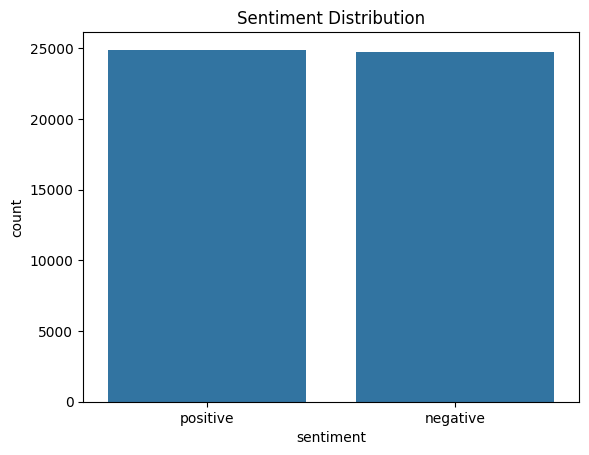

In [ ]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=imdb_data)
plt.title('Sentiment Distribution')
plt.show()


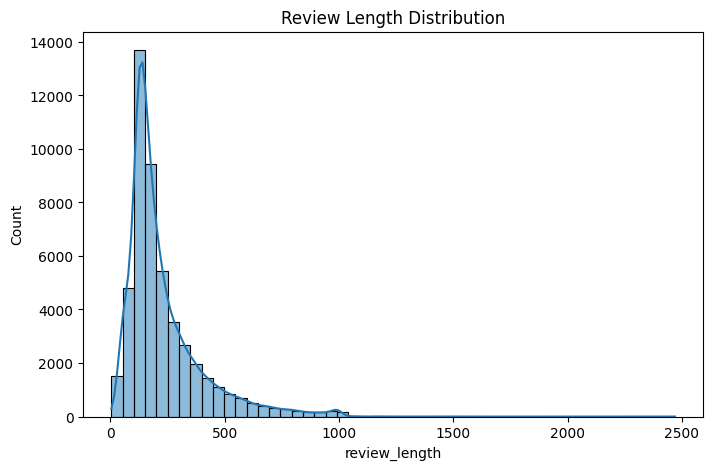

Max length: 2470
Average length: 231.35016739945948


In [ ]:
# Visualize the distribution of review lengths
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(imdb_data['review_length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.show()

print("Max length:", imdb_data['review_length'].max())
print("Average length:", imdb_data['review_length'].mean())


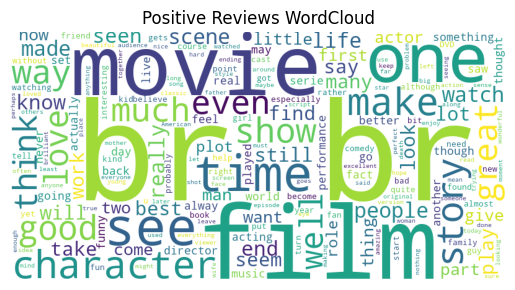

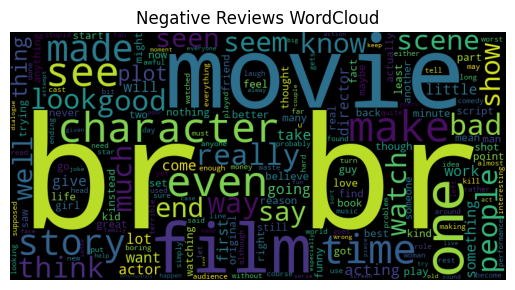

In [ ]:
# Visualize the word clouds for positive and negative reviews 
pos_text = " ".join(imdb_data[imdb_data['sentiment'] == 'positive']['review'])
neg_text = " ".join(imdb_data[imdb_data['sentiment'] == 'negative']['review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()


In [ ]:
# Preprocessing the data by removing punctuation, numbers, stop words, converting to lowercase, etc
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove punctuation/numbers
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

imdb_data['clean_review'] = imdb_data['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# Encode the sentiment labels
le = LabelEncoder()
imdb_data['sentiment_encoded'] = le.fit_transform(imdb_data['sentiment'])  # pos=1, neg=0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    imdb_data['clean_review'],
    imdb_data['sentiment_encoded'],
    test_size=0.2,
    random_state=42
)


In [ ]:
# Save the preprocessed data
X_train.to_csv(r"F:\Projects\Sentiment Analysis\data\X_train.csv", index=False)
X_test.to_csv(r"F:\Projects\Sentiment Analysis\data\X_test.csv", index=False)
y_train.to_csv(r"F:\Projects\Sentiment Analysis\data\y_train.csv", index=False)
y_test.to_csv(r"F:\Projects\Sentiment Analysis\data\y_test.csv", index=False)